In [187]:
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import itertools
print(check_output(["ls", "data"]).decode("utf8"))

data = pd.read_csv("data/bank.csv")
data.groupby('Exited').size()

bank.csv



Exited
0    7963
1    2037
dtype: int64

In [188]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [189]:
data.drop(['CustomerId'], axis=1, inplace=True)
data.drop(['RowNumber'], axis=1, inplace=True)

In [190]:
#Пустые значения
data.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [191]:
data['Exited'].unique()

array([1, 0])

In [192]:
#Размерность таблицы
data.shape

(10000, 12)

In [193]:
#Замена строковых типов числовым
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,289,308,0,0,21,1,0,1,0,0,4704,0
4,1822,459,2,0,25,2,3696,0,1,1,3925,0


In [194]:
#Проверка замены типов
data['Geography'].unique()

array([0, 2, 1])

In [195]:
#X = data.iloc[:,1:]
#y = data.iloc[:,11]

X = data.drop('Exited', axis=1)
y = data['Exited']
X.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1115,228,0,0,24,2,0,0,1,1,5068
1,1177,217,2,0,23,1,743,0,0,1,5639
2,2040,111,0,0,24,8,5793,2,1,0,5707
3,289,308,0,0,21,1,0,1,0,0,4704
4,1822,459,2,0,25,2,3696,0,1,1,3925


In [196]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [197]:
X.describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1507.774200,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,4998.621200
std,846.204311,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,773.750000,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2498.750000
50%,1542.000000,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,4998.500000
75%,2238.250000,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,7498.250000
max,2931.000000,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,9998.000000


In [198]:
data.corr()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,1.000000,0.007410,-0.022878,-0.002049,0.005432,-0.017412,-0.002350,-0.016460,-0.008993,0.001483,0.011862,-0.010822
CreditScore,0.007410,1.000000,0.008054,-0.002991,-0.003697,0.000664,0.002516,0.012171,-0.005326,0.025445,-0.001140,-0.026002
Geography,-0.022878,0.008054,1.000000,0.004719,0.022881,0.003739,0.051726,0.003972,-0.008523,0.006724,-0.001277,0.035943
Gender,-0.002049,-0.002991,0.004719,1.000000,-0.027664,0.014733,0.016055,-0.021859,0.005766,0.022544,-0.008269,-0.106512
Age,0.005432,-0.003697,0.022881,-0.027664,1.000000,-0.009936,0.019862,-0.030707,-0.011697,0.085408,-0.007334,0.285537
Tenure,-0.017412,0.000664,0.003739,0.014733,-0.009936,1.000000,-0.006728,0.013444,0.022583,-0.028362,0.007793,-0.014001
Balance,-0.002350,0.002516,0.051726,0.016055,0.019862,-0.006728,1.000000,-0.238570,-0.005535,-0.013556,0.009749,0.097264
NumOfProducts,-0.016460,0.012171,0.003972,-0.021859,-0.030707,0.013444,-0.238570,1.000000,0.003183,0.009612,0.014248,-0.047820
HasCrCard,-0.008993,-0.005326,-0.008523,0.005766,-0.011697,0.022583,-0.005535,0.003183,1.000000,-0.011866,-0.010042,-0.007138
IsActiveMember,0.001483,0.025445,0.006724,0.022544,0.085408,-0.028362,-0.013556,0.009612,-0.011866,1.000000,-0.011469,-0.156128


-----------------------------------
Логистическая регрессия
Confusion matrix, without normalization
[[2577   51]
 [ 566  106]]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


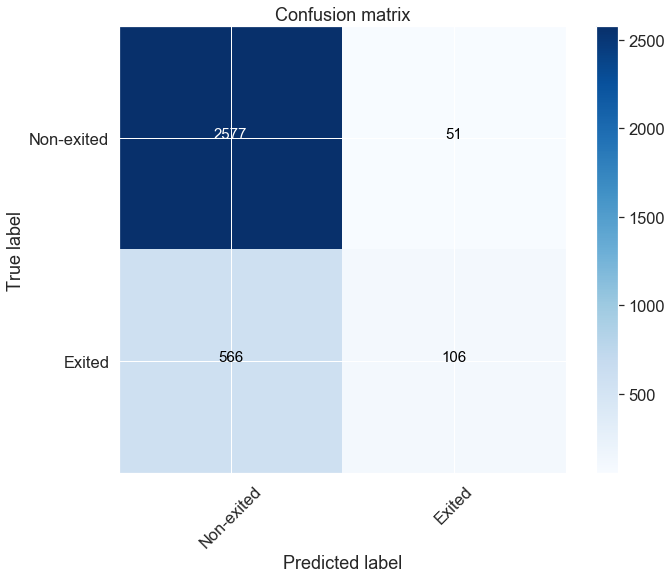

In [199]:
print("-----------------------------------")
print("Логистическая регрессия")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.33, random_state=42)

model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train, y_train)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model_LR.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-exited', 'Exited'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

#y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities
#y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

#confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
#print("Confusion matrix:")
#confusion_matrix

In [220]:
# To get the weights of all the variables
weights = pd.Series(model_LR.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Age                0.064036
NumOfProducts      0.027400
Balance            0.000103
EstimatedSalary    0.000003
Surname           -0.000074
CreditScore       -0.001615
Tenure            -0.016617
Geography         -0.036892
HasCrCard         -0.087155
Gender            -0.509838
IsActiveMember    -1.169842
dtype: float64

In [200]:
report = classification_report(y_test, model_LR.predict(X_test), target_names=['Non-exited', 'Exited'])
print(report)

              precision    recall  f1-score   support

  Non-exited       0.82      0.98      0.89      2628
      Exited       0.68      0.16      0.26       672

   micro avg       0.81      0.81      0.81      3300
   macro avg       0.75      0.57      0.57      3300
weighted avg       0.79      0.81      0.76      3300



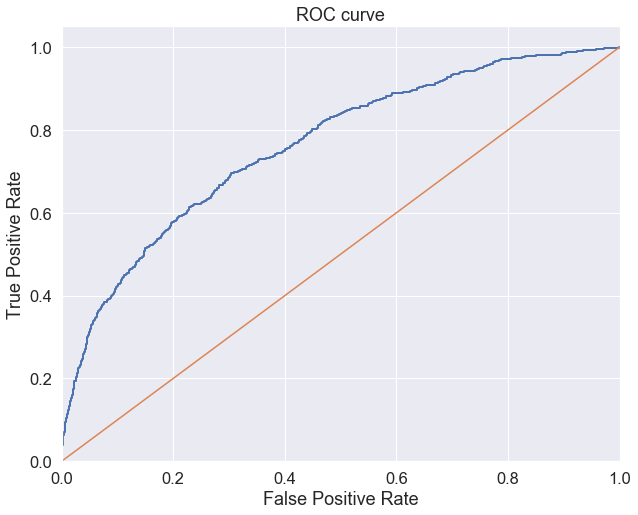

In [201]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_LR.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [202]:
auc_roc=metrics.roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.7623475664999636

In [203]:
prediction_test = model_LR.predict(X_test)
print("Accuracy: ")
metrics.accuracy_score(y_test, prediction_test)

Accuracy: 


0.813030303030303

-----------------------------------
Случайный лес
Confusion matrix, without normalization
[[2540   88]
 [ 387  285]]


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


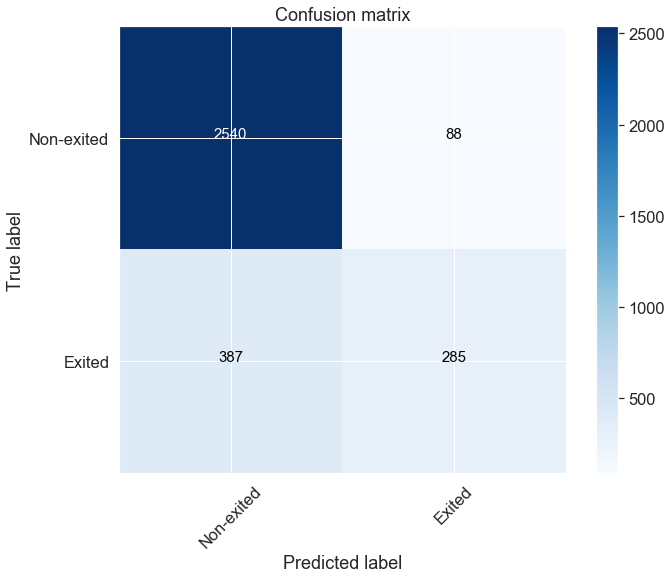

In [204]:
print("-----------------------------------")
print("Случайный лес")

model_RR=RandomForestClassifier()
model_RR.fit(X_train,y_train)

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model_RR.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-exited', 'Exited'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [205]:
prediction_test = model_RR.predict(X_test)
print("Accuracy: ")
metrics.accuracy_score(y_test, prediction_test)

Accuracy: 


0.8560606060606061

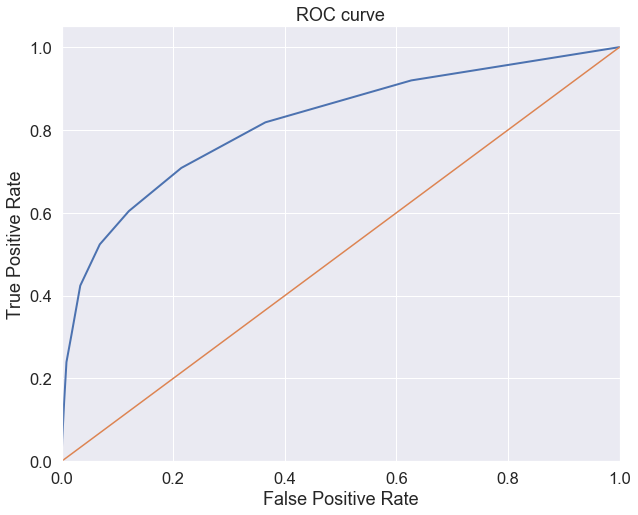

In [206]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_RR.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [207]:
auc_roc=metrics.roc_auc_score(y_test, model_RR.predict_proba(X_test)[:,1])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.8175339294774226

In [208]:
report = classification_report(y_test, model_RR.predict(X_test), target_names=['Non-exited', 'Exited'])
print(report)

              precision    recall  f1-score   support

  Non-exited       0.87      0.97      0.91      2628
      Exited       0.76      0.42      0.55       672

   micro avg       0.86      0.86      0.86      3300
   macro avg       0.82      0.70      0.73      3300
weighted avg       0.85      0.86      0.84      3300



-----------------------------------
К-случайных соседей
Confusion matrix, without normalization
[[2437  191]
 [ 623   49]]


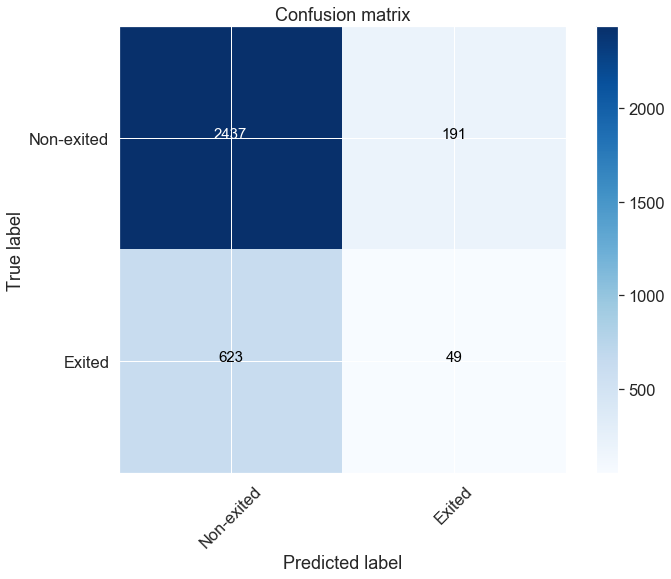

In [209]:
print("-----------------------------------")
print("К-случайных соседей")

model_KN=KNeighborsClassifier()
model_KN.fit(X_train, y_train)

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model_KN.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-exited', 'Exited'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [216]:
prediction_test = model_KN.predict(X_test)
print("Accuracy: ")
metrics.accuracy_score(y_test, prediction_test)

Accuracy: 


0.7533333333333333

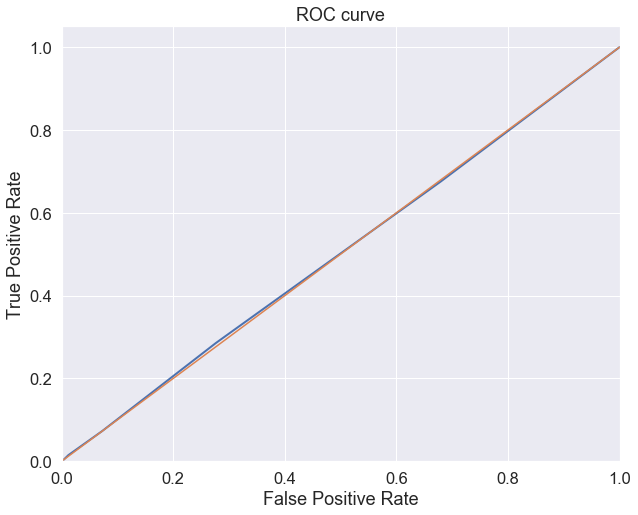

In [217]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, model_KN.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [218]:
auc_roc=metrics.roc_auc_score(y_test, model_KN.predict_proba(X_test)[:,1])
print("ROC_AUC:")
auc_roc

ROC_AUC:


0.5014289225012685

In [219]:
report = classification_report(y_test, model_KN.predict(X_test), target_names=['Non-exited', 'Exited'])
print(report)

              precision    recall  f1-score   support

  Non-exited       0.80      0.93      0.86      2628
      Exited       0.20      0.07      0.11       672

   micro avg       0.75      0.75      0.75      3300
   macro avg       0.50      0.50      0.48      3300
weighted avg       0.68      0.75      0.70      3300

